# Conclusión

En la siguiente gráfica se puede apreciar el comportamiento de los tres métodos de generación de datos sintéticos estudiados.

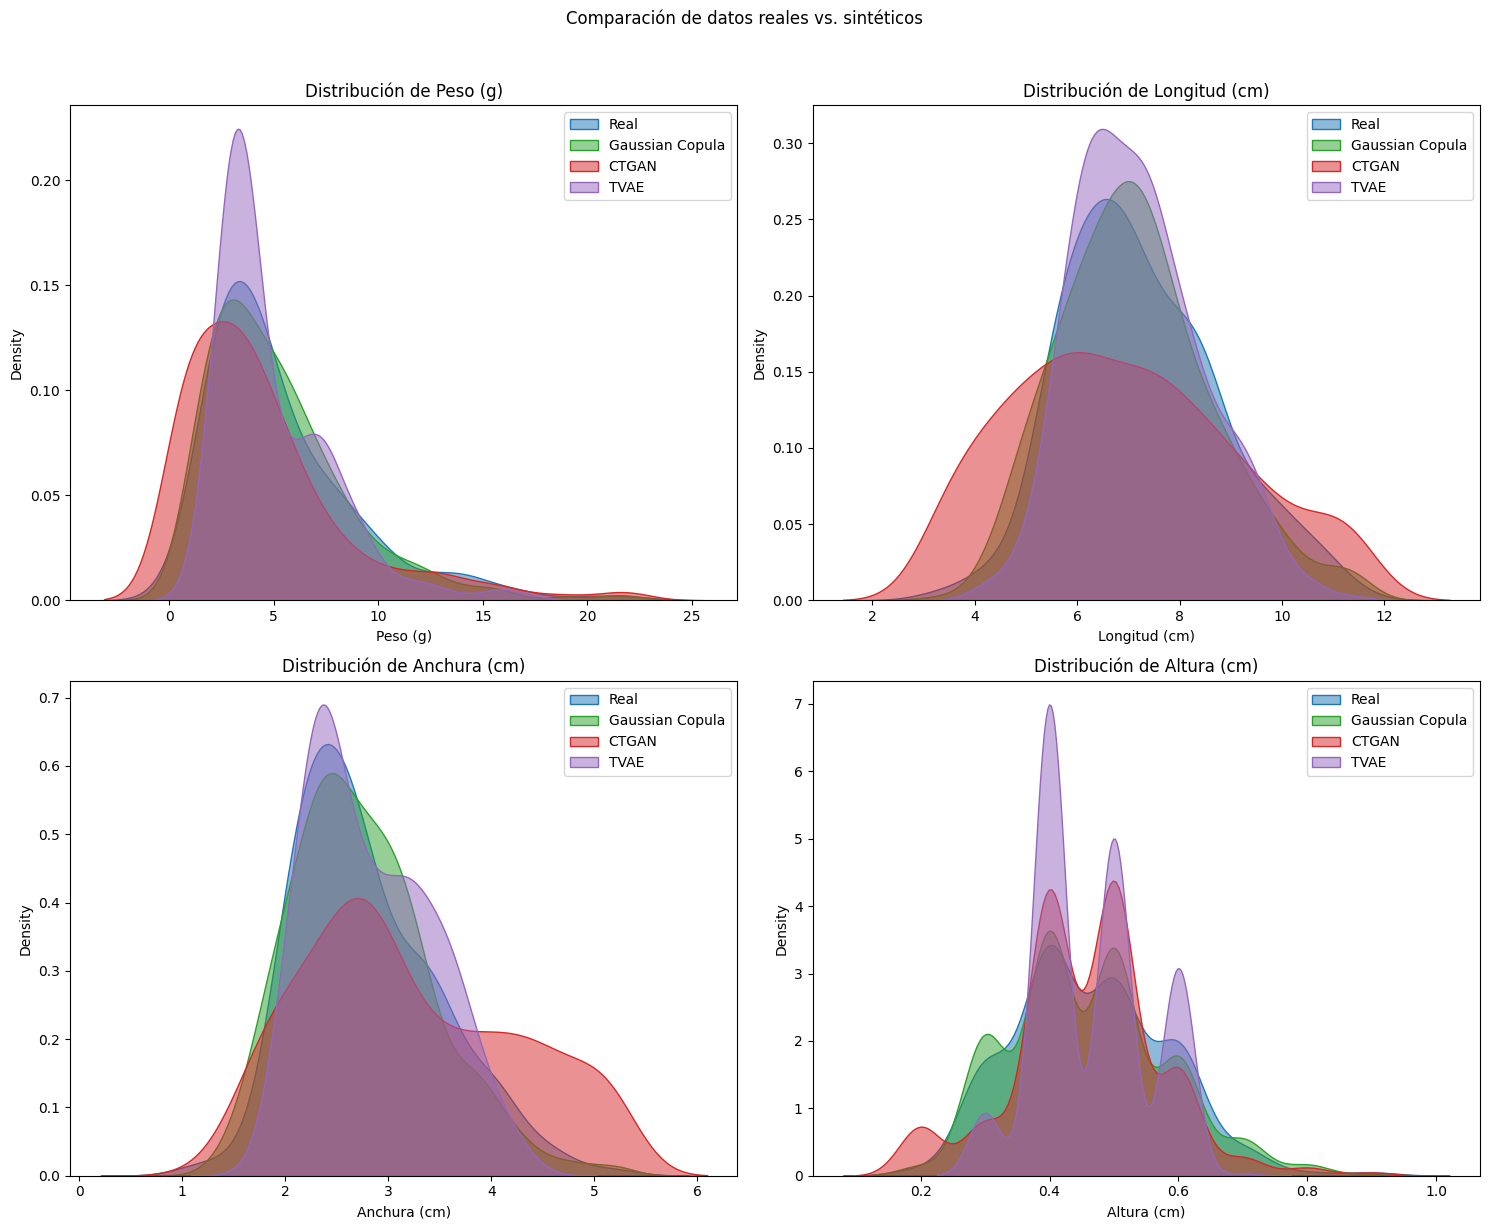

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from myst_nb import glue

real_data = pd.read_excel('.././data/Dimensiones_lenguado.xlsx' )
synthetic_data = pd.read_excel('.././data/SyntheticGaussianCopula.xlsx' )
syntheticGAN_data = pd.read_excel('.././data/SyntheticCTGAN.xlsx' )
syntheticTVAE_data = pd.read_excel('.././data/SyntheticTVAE.xlsx' )

columnas = ["Peso (g)", "Longitud (cm)", "Anchura (cm)", "Altura (cm)"]

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
for i, col in enumerate(columnas):
    ax = axs[i//2, i%2]
    sns.kdeplot(real_data[col], ax=ax, color="#1f77b4", label="Real", fill=True, alpha=0.5)
    sns.kdeplot(synthetic_data[col], ax=ax, color="#2ca02c", label="Gaussian Copula", fill=True, alpha=0.5)
    sns.kdeplot(syntheticGAN_data[col], ax=ax, color="#d62728", label="CTGAN", fill=True, alpha=0.5)
    sns.kdeplot(syntheticTVAE_data[col], ax=ax, color="#9467bd", label="TVAE", fill=True, alpha=0.5)
    ax.set_title(f'Distribución de {col}')
    ax.legend()
plt.suptitle('Comparación de datos reales vs. sintéticos', y=1.02)
plt.tight_layout()
plt.show()

Los resultados obtenidos con el método Gaussian Copula son los que mejor se ajustan al dataset real. TVAE también mantiene una adecuada distribución respecto a las variables individuales, pero muestra unos picos de densidad más elevados lo cual indica que está sobreestimando parámetros. Los resultados más pobres se han obtenido con CTGAN. Uno de los principales motivos de estos resulatdos tan bajos radica en que las GANs tabulares aprenden correlaciones mediante adversarial training, que es inestable con muestras pequeñas. [[Xu et al., 2019](https://doi.org/10.48550/arXiv.1907.00503)] recomiendan una población mínima de $N>1000$ muestras para que poder generalizar.